In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("twitter train.csv")
test = pd.read_csv("twitter test.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [9]:
train['length']=train['tweet'].apply(len)

In [10]:
train.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [11]:
train.describe()

,id,label,length
count,31962.000000,31962.000000,31962.000000
mean,15981.500000,0.070146,84.739628
std,9226.778988,0.255397,29.455749
min,1.000000,0.000000,11.000000
25%,7991.250000,0.000000,63.000000
50%,15981.500000,0.000000,88.000000
75%,23971.750000,0.000000,108.000000
max,31962.000000,1.000000,274.000000


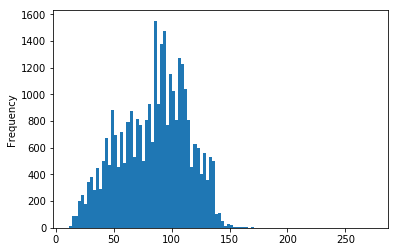

In [12]:
train['length'].plot(bins=100, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B79F9B0>,
      dtype=object)

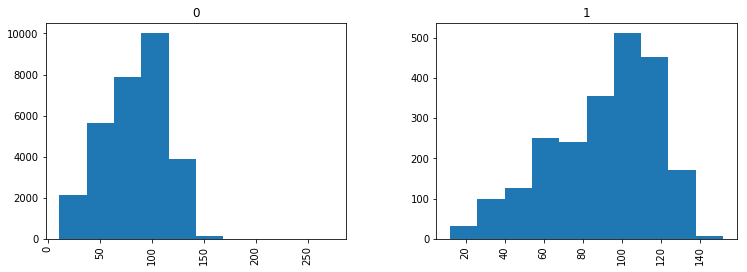

In [13]:
train.hist(column='length', by='label',figsize=(12,4))

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
import string

In [17]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
train['tweet'].head(5).apply(text_process)

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, u, take, u, time, urð±, ðð...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [19]:
train.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [20]:
train.tail()

,id,label,tweet,length
31957,31958,0,ate @user isz that youuu?ðððððð...,68
31958,31959,0,to see nina turner on the airwaves trying to...,131
31959,31960,0,listening to sad songs on a monday morning otw...,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",67
31961,31962,0,thank you @user for you follow,32


In [21]:
train['tweet'].apply(text_process)

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
5        [22, huge, fan, fare, big, talking, leave, cha...
6        [user, camping, tomorrow, user, user, user, us...
7        [next, school, year, year, examsð¯, cant, th...
8        [love, land, allin, cavs, champions, cleveland...
9                           [user, user, welcome, im, gr8]
10       [â, ireland, consumer, price, index, mom, cl...
11       [selfish, orlando, standwithorlando, pulseshoo...
12            [get, see, daddy, today, 80days, gettingfed]
13       [user, cnn, calls, michigan, middle, school, b...
14       [comment, australia, opkillingbay, seashepherd...
15       [ouchjunior, angryðgot7, junior, yugyoem, omg]
16                   [thankful, paner, thankful, positiv

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(train['tweet'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

47386


In [23]:
message4 = train['tweet'][3]
print(message4)

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  


In [24]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 23479)	1
  (0, 25568)	1
  (0, 37803)	1
  (0, 39042)	1
  (0, 40247)	2
  (0, 40738)	1
  (0, 46009)	1
  (0, 46774)	1
(1, 47386)


In [25]:
print(bow_transformer.get_feature_names()[40247])

u


In [26]:
messages_bow = bow_transformer.transform(train['tweet'])

In [27]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (31962, 47386)
Amount of Non-Zero occurences:  264168


In [28]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [29]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.01744199713925576


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 46774)	0.33868284036375246
  (0, 46009)	0.33849712270555316
  (0, 40738)	0.33868284036375246
  (0, 40247)	0.5824589470936167
  (0, 39042)	0.2659948520891146
  (0, 37803)	0.3005908483061276
  (0, 25568)	0.3306790008591863
  (0, 23479)	0.2151567315340197


In [31]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

4.80285284239482
7.522186661099058


In [32]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(31962, 47386)


In [33]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, train['label'])

In [34]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', train.label[3])

predicted: 0
expected: 0


In [35]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[0 0 0 ... 0 1 0]


In [37]:
from sklearn.metrics import classification_report
print (classification_report(train['label'], all_predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     29720
          1       1.00      0.21      0.35      2242

avg / total       0.95      0.94      0.93     31962



In [38]:
sample=pd.read_csv("twitter sample.csv")

In [39]:
sample.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [40]:
sample['label']=all_predictions
sample['id']=test_original['id']

ValueError: Length of values does not match length of index